In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preparation

# Load your dataset (upload the CSV file to Colab)

In [47]:
from google.colab import files
uploaded = files.upload()

Saving real_asset_returns.csv to real_asset_returns.csv


In [48]:
df = pd.read_csv(next(iter(uploaded)))

# Show the first few rows of your dataset to verify it's loaded correctly

In [49]:
df.head()

,Date,AAPL,AMZN,GOOGL,JNJ,JPM,MSFT,NVDA,TSLA,V,XOM
0,2019-05-06,-0.015443,-0.006069,0.003287,0.000563,-0.008870,-0.005818,-0.017267,0.001216,0.001481,-0.004389
1,2019-05-07,-0.026957,-0.015150,-0.012233,-0.014920,-0.016335,-0.020523,-0.037476,-0.032427,-0.012756,-0.005316
2,2019-05-08,0.000197,-0.001681,-0.006854,-0.001286,-0.005300,-0.000080,0.004679,-0.008986,0.003433,0.001564
3,2019-05-09,-0.010744,-0.009334,-0.002400,-0.007583,-0.000799,-0.000080,-0.021447,-0.011681,-0.005909,-0.000911
4,2019-05-10,-0.013853,-0.005206,-0.000283,0.002306,-0.000089,0.012988,-0.008050,-0.010166,0.005632,0.008695


# Calculate the expected returns (mu) and covariance matrix (Sigma)

 # Calculate daily returns and drop NaNs

In [50]:
df.info()  # To see the columns and datatypes
print(df.isnull().sum())  # To check if there are any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1508 non-null   object 
 1   AAPL    1508 non-null   float64
 2   AMZN    1508 non-null   float64
 3   GOOGL   1508 non-null   float64
 4   JNJ     1508 non-null   float64
 5   JPM     1508 non-null   float64
 6   MSFT    1508 non-null   float64
 7   NVDA    1508 non-null   float64
 8   TSLA    1508 non-null   float64
 9   V       1508 non-null   float64
 10  XOM     1508 non-null   float64
dtypes: float64(10), object(1)
memory usage: 129.7+ KB
Date     0
AAPL     0
AMZN     0
GOOGL    0
JNJ      0
JPM      0
MSFT     0
NVDA     0
TSLA     0
V        0
XOM      0
dtype: int64


In [51]:
# Drop the date column if not needed in calculations
returns = df.drop(columns=['Date'])

# Convert all values to numeric (in case some are strings)
returns = returns.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaNs
returns.dropna(inplace=True)


In [52]:
print(df.head())  # Verify the data after cleaning


         Date      AAPL      AMZN     GOOGL       JNJ       JPM      MSFT  \
0  2019-05-06 -0.015443 -0.006069  0.003287  0.000563 -0.008870 -0.005818   
1  2019-05-07 -0.026957 -0.015150 -0.012233 -0.014920 -0.016335 -0.020523   
2  2019-05-08  0.000197 -0.001681 -0.006854 -0.001286 -0.005300 -0.000080   
3  2019-05-09 -0.010744 -0.009334 -0.002400 -0.007583 -0.000799 -0.000080   
4  2019-05-10 -0.013853 -0.005206 -0.000283  0.002306 -0.000089  0.012988   

       NVDA      TSLA         V       XOM  
0 -0.017267  0.001216  0.001481 -0.004389  
1 -0.037476 -0.032427 -0.012756 -0.005316  
2  0.004679 -0.008986  0.003433  0.001564  
3 -0.021447 -0.011681 -0.005909 -0.000911  
4 -0.008050 -0.010166  0.005632  0.008695  


In [53]:
# Expected return vector (mu)
mu = np.mean(returns, axis=0)

# Covariance matrix (Sigma)
Sigma = np.cov(returns.T)

# Step 2: Adaptive Genetic Algorithm (AGA)


In [54]:
def fitness(x, mu, Sigma, lmbda):
    return np.dot(mu.T, x) - lmbda * np.dot(np.dot(x.T, Sigma), x)

In [57]:
def initialize_population(pop_size, n_assets):
    population = np.random.dirichlet(np.ones(n_assets), size=pop_size)
    return population

In [58]:
# AGA Parameters
n_assets = returns.shape[1]
n_generations = 100
population_size = 50
lmbda = 0.5

In [62]:
# Initialize population
population = initialize_population(population_size, n_assets)


In [63]:
# AGA Loop: Tournament selection, crossover, mutation, elitism
def run_aga():
    best_fitness = -np.inf
    for generation in range(n_generations):
        fitness_scores = np.array([fitness(ind, mu, Sigma, lmbda) for ind in population])
        best_fitness = max(fitness_scores)
        print(f"Generation {generation+1}: Best Fitness = {best_fitness}")

    return population[np.argmax(fitness_scores)]  # Best solution after AGA


In [64]:
# Run AGA
best_portfolio_aga = run_aga()

Generation 1: Best Fitness = 0.0013963639725736502
Generation 2: Best Fitness = 0.0013963639725736502
Generation 3: Best Fitness = 0.0013963639725736502
Generation 4: Best Fitness = 0.0013963639725736502
Generation 5: Best Fitness = 0.0013963639725736502
Generation 6: Best Fitness = 0.0013963639725736502
Generation 7: Best Fitness = 0.0013963639725736502
Generation 8: Best Fitness = 0.0013963639725736502
Generation 9: Best Fitness = 0.0013963639725736502
Generation 10: Best Fitness = 0.0013963639725736502
Generation 11: Best Fitness = 0.0013963639725736502
Generation 12: Best Fitness = 0.0013963639725736502
Generation 13: Best Fitness = 0.0013963639725736502
Generation 14: Best Fitness = 0.0013963639725736502
Generation 15: Best Fitness = 0.0013963639725736502
Generation 16: Best Fitness = 0.0013963639725736502
Generation 17: Best Fitness = 0.0013963639725736502
Generation 18: Best Fitness = 0.0013963639725736502
Generation 19: Best Fitness = 0.0013963639725736502
Generation 20: Best F

# Step 3: Particle Swarm Optimization (PSO)


In [65]:
# PSO Parameters
swarm_size = 50
n_iterations = 100
w = 0.7  # Inertia weight
c1 = c2 = 1.5  # Acceleration coefficients


In [66]:
# Initialize swarm
particles = np.random.rand(swarm_size, n_assets)
velocities = np.random.randn(swarm_size, n_assets)


In [67]:
# PSO Fitness Evaluation and Update
def update_pso(particles, velocities):  # Pass particles and velocities as arguments
    global best_portfolio_aga
    personal_best = particles.copy()
    global_best = best_portfolio_aga

    for iteration in range(n_iterations):
        fitness_scores = np.array([fitness(particle, mu, Sigma, lmbda) for particle in particles])
        best_idx = np.argmax(fitness_scores)
        personal_best_fitness = fitness_scores[best_idx]
        global_best_fitness = fitness_scores[best_idx]

        # Update particle velocity and position
        r1, r2 = np.random.rand(2)
        velocities = w * velocities + c1 * r1 * (personal_best - particles) + c2 * r2 * (global_best - particles)
        particles += velocities

        # Normalize and clip to ensure valid portfolios
        particles = np.clip(particles, 0, 1)
        particles /= particles.sum(axis=1)[:, None]

        print(f"PSO Iteration {iteration+1}: Global Best Fitness = {global_best_fitness}")

    return particles[np.argmax(fitness_scores)]  # Best solution after PSO

In [68]:
# Run PSO, passing particles and velocities to update_pso
best_portfolio_pso = update_pso(particles, velocities)

PSO Iteration 1: Global Best Fitness = 0.0030972305946112473
PSO Iteration 2: Global Best Fitness = 0.0017849973823202267
PSO Iteration 3: Global Best Fitness = 0.0020284801979234945
PSO Iteration 4: Global Best Fitness = 0.001505391527716083
PSO Iteration 5: Global Best Fitness = 0.001373343868431669
PSO Iteration 6: Global Best Fitness = 0.0013251639636075174
PSO Iteration 7: Global Best Fitness = 0.0013458304627404262
PSO Iteration 8: Global Best Fitness = 0.00133487435109215
PSO Iteration 9: Global Best Fitness = 0.0013274780298346543
PSO Iteration 10: Global Best Fitness = 0.0013025727968520092
PSO Iteration 11: Global Best Fitness = 0.001317620756935835
PSO Iteration 12: Global Best Fitness = 0.0013284459569700118
PSO Iteration 13: Global Best Fitness = 0.0013440925976715705
PSO Iteration 14: Global Best Fitness = 0.0013219865339197845
PSO Iteration 15: Global Best Fitness = 0.001309013754694515
PSO Iteration 16: Global Best Fitness = 0.0013213185514012967
PSO Iteration 17: Globa

# Step 4: Local Refinement using Hill Climbing


In [69]:
def hill_climb(best_x):
    epsilon = 0.01
    n_iterations = 50
    current_fitness = fitness(best_x, mu, Sigma, lmbda)

    for iteration in range(n_iterations):
        new_x = best_x.copy()
        idx = np.random.randint(0, n_assets)
        new_x[idx] += epsilon
        new_x = np.clip(new_x, 0, 1)
        new_x /= new_x.sum()  # Ensure the sum of weights is 1

        new_fitness = fitness(new_x, mu, Sigma, lmbda)

        if new_fitness > current_fitness:
            best_x = new_x
            current_fitness = new_fitness

        print(f"Hill Climbing Iteration {iteration+1}: Fitness = {current_fitness}")

    return best_x


In [70]:
# Run Hill Climbing
best_portfolio_final = hill_climb(best_portfolio_pso)


Hill Climbing Iteration 1: Fitness = 0.0012868557419379166
Hill Climbing Iteration 2: Fitness = 0.0012868557419379166
Hill Climbing Iteration 3: Fitness = 0.0012868557419379166
Hill Climbing Iteration 4: Fitness = 0.0012868557419379166
Hill Climbing Iteration 5: Fitness = 0.0012868557419379166
Hill Climbing Iteration 6: Fitness = 0.0012868557419379166
Hill Climbing Iteration 7: Fitness = 0.0012868557419379166
Hill Climbing Iteration 8: Fitness = 0.0012868557419379166
Hill Climbing Iteration 9: Fitness = 0.0012970001229838535
Hill Climbing Iteration 10: Fitness = 0.0012970001229838535
Hill Climbing Iteration 11: Fitness = 0.0012970001229838535
Hill Climbing Iteration 12: Fitness = 0.0012970001229838535
Hill Climbing Iteration 13: Fitness = 0.0012970001229838535
Hill Climbing Iteration 14: Fitness = 0.0012970001229838535
Hill Climbing Iteration 15: Fitness = 0.0012970001229838535
Hill Climbing Iteration 16: Fitness = 0.0012970001229838535
Hill Climbing Iteration 17: Fitness = 0.001297000

# Step 5: Final Output


In [71]:
# Weights of the optimized portfolio
print("Optimized Portfolio Weights (final):")
print(best_portfolio_final)

Optimized Portfolio Weights (final):
[0.03635753 0.05018786 0.03523736 0.01992944 0.16023609 0.16023609
 0.17974688 0.18925961 0.16023609 0.00857306]


In [72]:
# Expected return of the optimized portfolio
expected_return = np.dot(mu.T, best_portfolio_final)
print(f"Expected Return: {expected_return}")


Expected Return: 0.0015261967760267833


In [73]:
# Risk (Variance) of the optimized portfolio
portfolio_risk = np.dot(np.dot(best_portfolio_final.T, Sigma), best_portfolio_final)
print(f"Risk (Variance): {portfolio_risk}")


Risk (Variance): 0.00037770428686949965


In [74]:
# Fitness Score of the optimized portfolio
fitness_score = fitness(best_portfolio_final, mu, Sigma, lmbda)
print(f"Fitness Score: {fitness_score}")


Fitness Score: 0.0013373446325920335


# Step 6: Visualization


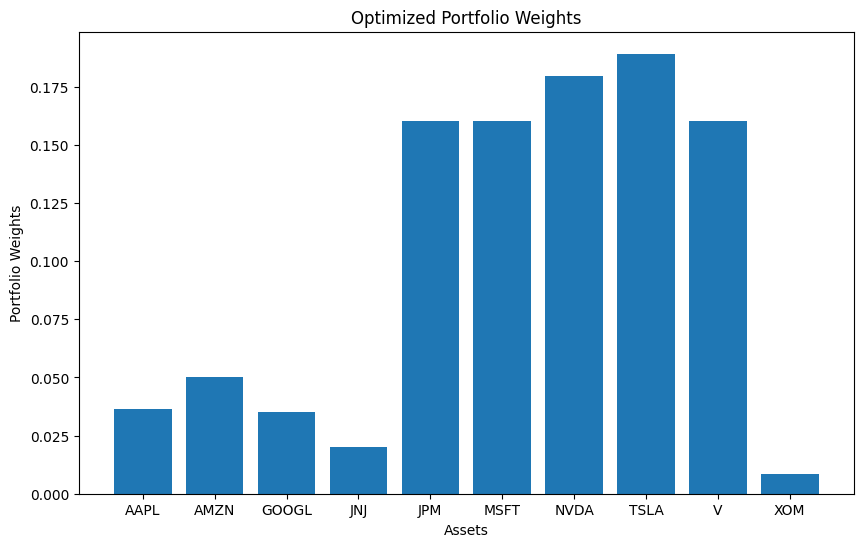

In [75]:
# 1. Portfolio Weights Visualization (Bar Chart)
plt.figure(figsize=(10, 6))
# Exclude the 'Date' column from tick labels
plt.bar(range(n_assets), best_portfolio_final, tick_label=df.columns[1:])
plt.xlabel('Assets')
plt.ylabel('Portfolio Weights')
plt.title('Optimized Portfolio Weights')
plt.show()

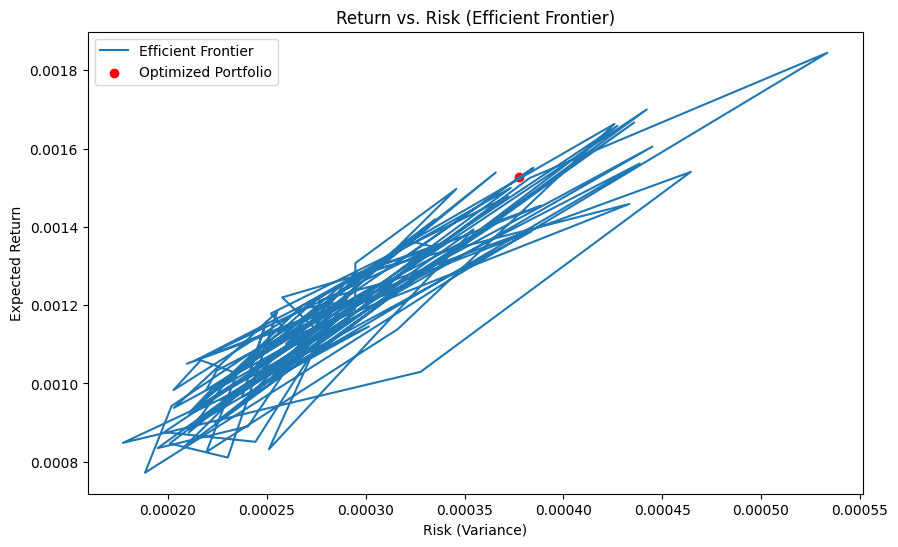

In [76]:
# 2. Return vs. Risk (Efficient Frontier)
n_points = 100
returns_list = []
risks_list = []

for i in range(n_points):
    weights = np.random.dirichlet(np.ones(n_assets), 1)[0]
    returns_list.append(np.dot(mu.T, weights))
    risks_list.append(np.dot(np.dot(weights.T, Sigma), weights))

plt.figure(figsize=(10, 6))
plt.plot(risks_list, returns_list, label='Efficient Frontier')
plt.scatter(portfolio_risk, expected_return, color='red', label='Optimized Portfolio')
plt.xlabel('Risk (Variance)')
plt.ylabel('Expected Return')
plt.title('Return vs. Risk (Efficient Frontier)')
plt.legend()
plt.show()

In [79]:
from scipy.optimize import minimize

# 1. Equal-weighted Portfolio
equal_weights = np.ones(n_assets) / n_assets
equal_ret = np.dot(mu, equal_weights)
equal_risk = np.dot(equal_weights.T, np.dot(Sigma, equal_weights))
equal_fit = fitness(equal_weights, mu, Sigma, lmbda)

# 2. Mean-Variance Optimization using scipy
def neg_fitness(x):
    return -fitness(x, mu, Sigma, lmbda)

constraints = ({
    'type': 'eq',
    'fun': lambda x: np.sum(x) - 1
})
bounds = [(0, 1)] * n_assets
x0 = equal_weights

res = minimize(neg_fitness, x0, method='SLSQP', bounds=bounds, constraints=constraints)
mvo_weights = res.x
mvo_ret = np.dot(mu, mvo_weights)
mvo_risk = np.dot(mvo_weights.T, np.dot(Sigma, mvo_weights))
mvo_fit = fitness(mvo_weights, mu, Sigma, lmbda)

# 3. Collect results
results_df = pd.DataFrame({
    'Method': ['Equal-Weight', 'Mean-Variance', 'AGA Only', 'PSO Only', 'Hybrid (AGA+PSO+HC)'],
    'Expected Return': [
        equal_ret,
        mvo_ret,
        np.dot(mu, best_portfolio_aga),
        np.dot(mu, best_portfolio_pso),
        np.dot(mu, best_portfolio_final),
    ],
    'Risk (Variance)': [
        equal_risk,
        mvo_risk,
        np.dot(best_portfolio_aga.T, np.dot(Sigma, best_portfolio_aga)),
        np.dot(best_portfolio_pso.T, np.dot(Sigma, best_portfolio_pso)),
        np.dot(best_portfolio_final.T, np.dot(Sigma, best_portfolio_final)),
    ],
    'Fitness Score': [
        equal_fit,
        mvo_fit,
        fitness(best_portfolio_aga, mu, Sigma, lmbda),
        fitness(best_portfolio_pso, mu, Sigma, lmbda),
        fitness(best_portfolio_final, mu, Sigma, lmbda),
    ]
})

print("\n📊 Portfolio Optimization Comparison:")
print(results_df.round(5))



📊 Portfolio Optimization Comparison:
                Method  Expected Return  Risk (Variance)  Fitness Score
0         Equal-Weight          0.00115          0.00025        0.00103
1        Mean-Variance          0.00272          0.00105        0.00220
2             AGA Only          0.00160          0.00041        0.00140
3             PSO Only          0.00146          0.00036        0.00129
4  Hybrid (AGA+PSO+HC)          0.00153          0.00038        0.00134


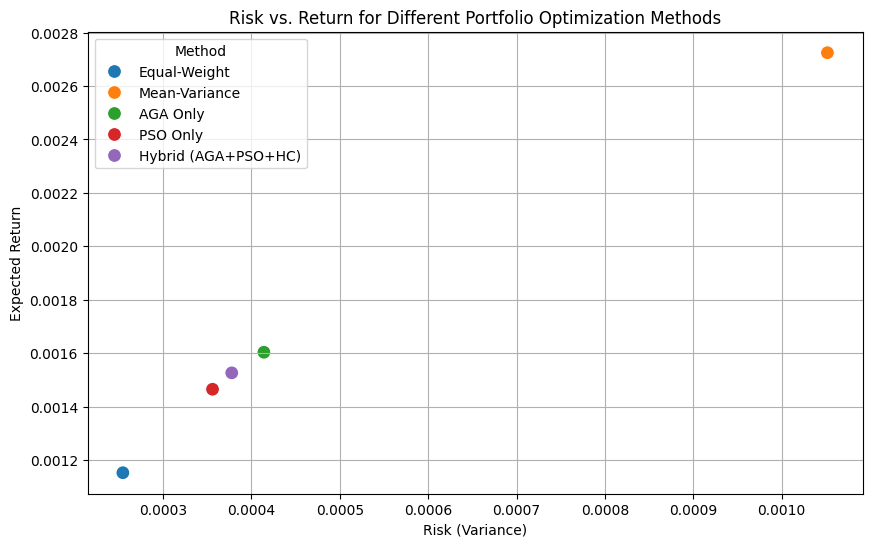

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Risk (Variance)', y='Expected Return', hue='Method', s=100)
plt.title('Risk vs. Return for Different Portfolio Optimization Methods')
plt.grid(True)
plt.show()


<ipython-input-81-5f4a2fd7e6a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Method', y='Fitness Score', palette='viridis')


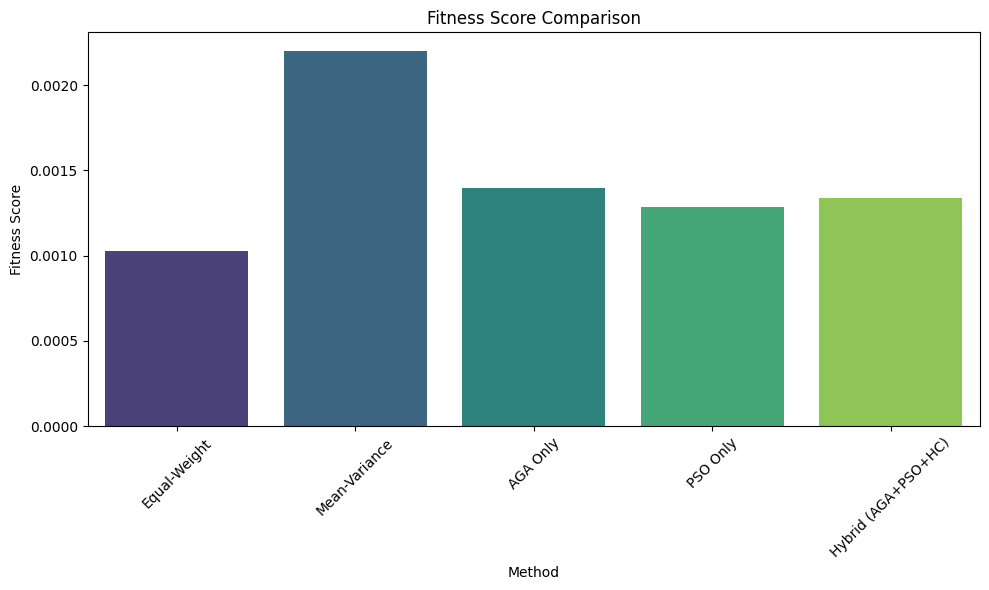

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Method', y='Fitness Score', palette='viridis')
plt.title('Fitness Score Comparison')
plt.ylabel('Fitness Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


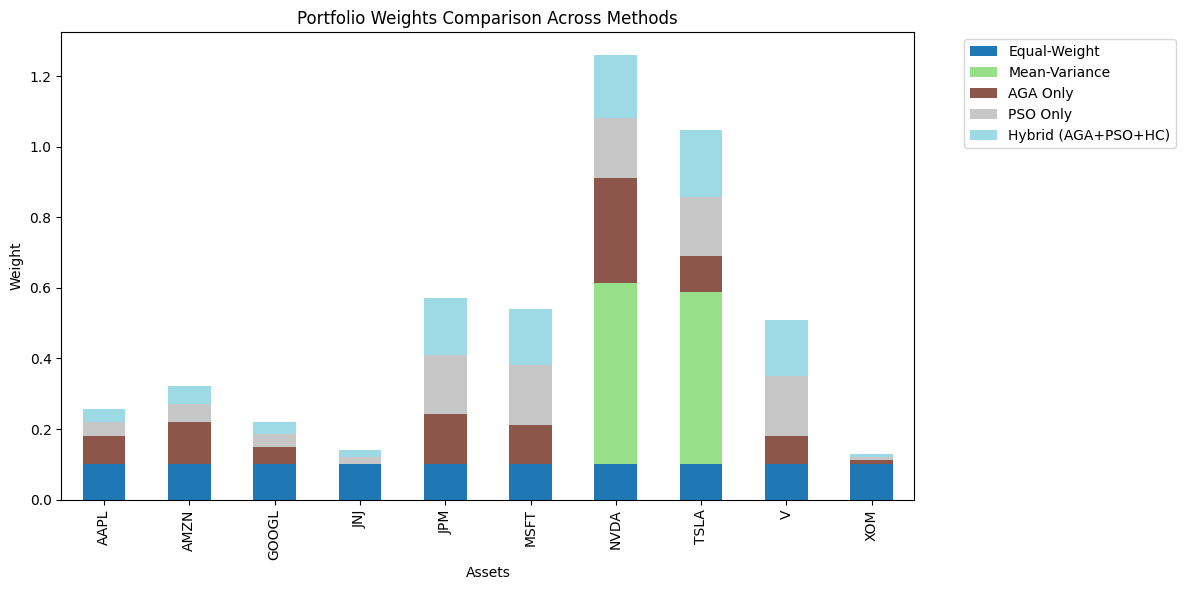

In [83]:
portfolio_matrix = np.vstack([
    equal_weights,
    mvo_weights,
    best_portfolio_aga,
    best_portfolio_pso,
    best_portfolio_final
])

# Exclude the 'Date' column from the columns list
weights_df = pd.DataFrame(portfolio_matrix, columns=df.columns[1:])  # Use df.columns[1:]

weights_df['Method'] = results_df['Method']

weights_df.set_index('Method').T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Portfolio Weights Comparison Across Methods')
plt.ylabel('Weight')
plt.xlabel('Assets')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [86]:
import time

# Timing each method
timing_results = {}

# 1. Equal-Weight
start = time.time()
equal_weight = np.ones(n_assets) / n_assets
_ = fitness(equal_weight, mu, Sigma, lmbda)
timing_results['Equal-Weight'] = time.time() - start

# 2. Mean-Variance Optimization (using SciPy)
from scipy.optimize import minimize

start = time.time()
def objective_mvo(x):
    return -fitness(x, mu, Sigma, lmbda)

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(n_assets))
result = minimize(objective_mvo, equal_weight, bounds=bounds, constraints=constraints)
_ = result.x
timing_results['Mean-Variance'] = time.time() - start

# 3. AGA Only
start = time.time()
_ = run_aga()
timing_results['AGA Only'] = time.time() - start

# 4. PSO Only
start = time.time()
_ = update_pso(particles, velocities)
timing_results['PSO Only'] = time.time() - start

# 5. Hybrid (AGA + PSO + Hill Climb)
start = time.time()
_ = hill_climb(best_portfolio_pso)
timing_results['Hybrid (AGA+PSO+HC)'] = time.time() - start


Generation 1: Best Fitness = 0.0013963639725736502
Generation 2: Best Fitness = 0.0013963639725736502
Generation 3: Best Fitness = 0.0013963639725736502
Generation 4: Best Fitness = 0.0013963639725736502
Generation 5: Best Fitness = 0.0013963639725736502
Generation 6: Best Fitness = 0.0013963639725736502
Generation 7: Best Fitness = 0.0013963639725736502
Generation 8: Best Fitness = 0.0013963639725736502
Generation 9: Best Fitness = 0.0013963639725736502
Generation 10: Best Fitness = 0.0013963639725736502
Generation 11: Best Fitness = 0.0013963639725736502
Generation 12: Best Fitness = 0.0013963639725736502
Generation 13: Best Fitness = 0.0013963639725736502
Generation 14: Best Fitness = 0.0013963639725736502
Generation 15: Best Fitness = 0.0013963639725736502
Generation 16: Best Fitness = 0.0013963639725736502
Generation 17: Best Fitness = 0.0013963639725736502
Generation 18: Best Fitness = 0.0013963639725736502
Generation 19: Best Fitness = 0.0013963639725736502
Generation 20: Best F

<ipython-input-67-4edaa05771eb>:20: RuntimeWarning: invalid value encountered in divide
  particles /= particles.sum(axis=1)[:, None]


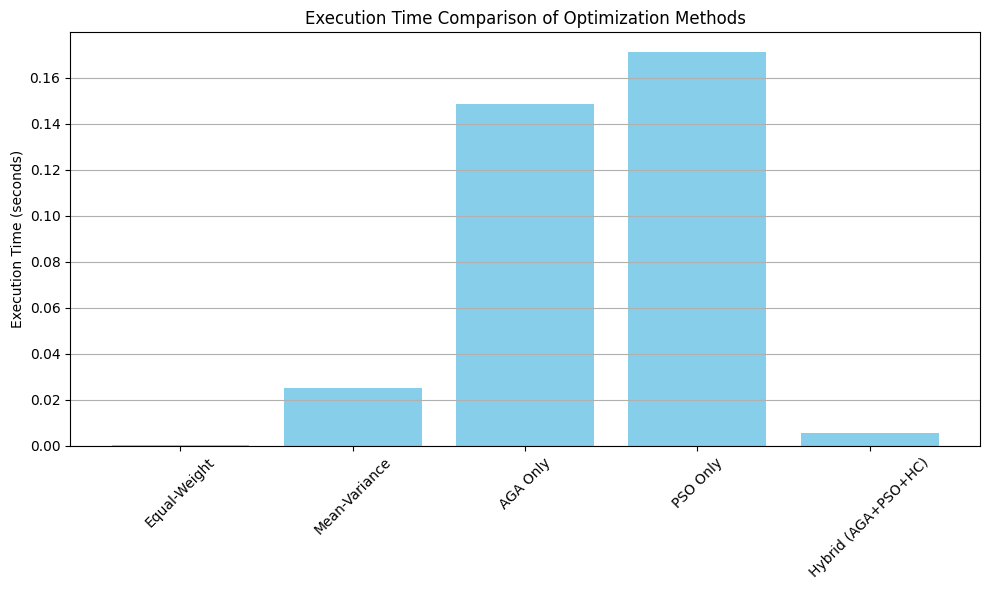

In [87]:
# Plot time comparison
plt.figure(figsize=(10, 6))
methods = list(timing_results.keys())
times = list(timing_results.values())

plt.bar(methods, times, color='skyblue')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison of Optimization Methods')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
